### Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve

## Klasifikasi Random Forest

**dataset 1 (lipinsky)**

In [ ]:
df_PDL1 = pd.read_csv('/content/label2class_PD-L1.csv')
df_PDL1

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.53,3.87,2,5,7.02
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.66,5.62,2,6,8.60
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.61,6.50,1,5,8.66
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.11,7.89,4,12,8.52
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.00,9.66,2,10,8.42
...,...,...,...,...,...,...,...,...
1015,CHEMBL4776700,active,Cn1cnc(S(=O)(=O)N2CCCC3=C[C@H]4C[C@H](CN5CCCC[...,376.53,2.00,0,5,9.00
1016,CHEMBL5171101,active,CCCC[C@H]1C(=O)N(C)[C@@H](CCCC)C(=O)N[C@@H](C)...,1866.14,-3.56,19,23,8.99
1017,CHEMBL5411746,inactive,CC(C)OC(=O)[C@@H](Cn1ccnc1)NC(=O)C1CCCN(C(=O)c...,488.59,3.54,1,6,7.20
1018,CHEMBL5398154,active,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN3CCCC[C@H]3C(=...,753.34,7.71,2,9,9.32


**Melakukan transformasi class menjadi numeric ordinal**

In [ ]:
# Mapping kelas kategori (class) ke nilai numerik (0,1)
mapping = {'active': 0, 'inactive': 1}
df_PDL1['class_numeric'] = df_PDL1['class'].map(mapping)

df_PDL1

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.53,3.87,2,5,7.02,1
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.66,5.62,2,6,8.60,0
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.61,6.50,1,5,8.66,0
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.11,7.89,4,12,8.52,0
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.00,9.66,2,10,8.42,0
...,...,...,...,...,...,...,...,...,...
1015,CHEMBL4776700,active,Cn1cnc(S(=O)(=O)N2CCCC3=C[C@H]4C[C@H](CN5CCCC[...,376.53,2.00,0,5,9.00,0
1016,CHEMBL5171101,active,CCCC[C@H]1C(=O)N(C)[C@@H](CCCC)C(=O)N[C@@H](C)...,1866.14,-3.56,19,23,8.99,0
1017,CHEMBL5411746,inactive,CC(C)OC(=O)[C@@H](Cn1ccnc1)NC(=O)C1CCCN(C(=O)c...,488.59,3.54,1,6,7.20,1
1018,CHEMBL5398154,active,Cc1c(COc2cc(OCc3cncc(C#N)c3)c(CN3CCCC[C@H]3C(=...,753.34,7.71,2,9,9.32,0


**dataset 2 (finger print)**

In [ ]:
df_fp = pd.read_csv('/content/dataset_model_PD-L1.csv')
df_fp = df_fp.drop(columns='pIC50')
df_fp

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,MW,LogP,NumHDonors,NumHAcceptors
0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,419.53,3.87,2,5
1,1,1,1,0,0,0,0,0,1,1,...,0,1,1,1,0,0,534.66,5.62,2,6
2,0,0,0,0,0,0,0,0,1,1,...,0,1,1,1,0,0,477.61,6.50,1,5
3,1,1,1,1,0,0,0,0,1,1,...,0,1,1,1,0,0,915.11,7.89,4,12
4,1,1,1,1,0,0,0,0,1,1,...,0,1,1,1,0,0,801.00,9.66,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0,1,1,1,1,0,0,0,1,1,...,0,1,1,1,0,0,376.53,2.00,0,5
1016,1,0,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,1866.14,-3.56,19,23
1017,1,1,1,1,1,0,0,0,1,1,...,0,1,1,1,0,0,488.59,3.54,1,6
1018,0,1,1,1,0,1,1,1,1,1,...,0,0,0,0,1,0,753.34,7.71,2,9


**dataset 3 (combined)**

In [ ]:
df = pd.concat([df_PDL1,df_fp], axis=1)
df.head()

,molecule_chembl_id,class,canonical_smiles,MW,LogP,NumHDonors,NumHAcceptors,pIC50,class_numeric,0,...,175,176,177,178,179,180,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL4089730,inactive,COc1nc(OCc2cccc(-c3ccccc3)c2C)ccc1CNCCNC(C)=O,419.53,3.87,2,5,7.02,1,0,...,0,0,1,0,0,0,419.53,3.87,2,5
1,CHEMBL4516321,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1...,534.66,5.62,2,6,8.60,0,1,...,0,1,1,1,0,0,534.66,5.62,2,6
2,CHEMBL4436703,active,CCNCc1cc(C)c(OCc2cccc(-c3ccccc3)c2C)cc1OCc1cnc...,477.61,6.50,1,5,8.66,0,0,...,0,1,1,1,0,0,477.61,6.50,1,5
3,CHEMBL4575618,active,CC(=O)NCCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OC...,915.11,7.89,4,12,8.52,0,1,...,0,1,1,1,0,0,915.11,7.89,4,12
4,CHEMBL4528795,active,CCNCc1cc(C)c(OCc2cccc(-c3cccc(COc4cc(OCc5cncc(...,801.00,9.66,2,10,8.42,0,1,...,0,1,1,1,0,0,801.00,9.66,2,10


In [ ]:
X = df.drop(columns=['molecule_chembl_id', 'canonical_smiles', 'class', 'class_numeric', 'MW','LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']) # Changed 'class numeric' to 'class_numeric'
X = X.astype(float)
X

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
3,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
4,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
1016,1.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1017,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,0.00,0.00
1018,0.00,1.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00


In [ ]:
y = df['class_numeric']
y

,class_numeric
0,1
1,0
2,0
3,0
4,0
...,...
1015,0
1016,0
1017,1
1018,0


In [ ]:
y.value_counts()

,count
class_numeric,
1,846
0,174


In [ ]:
X.shape, y.shape

((1020, 181), (1020,))

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
X_resampled

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
1,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
3,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
4,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00
1688,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,...,0.00,1.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00
1689,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,...,1.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00
1690,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,0.00,1.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.00


In [ ]:
y_resampled.value_counts()

,count
class_numeric,
1,846
0,846


### Split Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1353, 181), (339, 181), (1353,), (339,))

* X_train: (1353, 181) -> Fitur training
* y_train: (1353,) -> Target training
* X_test: (339, 181) -> Fitur testing
* y_test: (339,) -> Target testing

### Random forest (tanpa pipeline)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
accuracy = rfc.score(X_test, y_test)
print(accuracy)

0.9351032448377581


### Pipeline

In [ ]:
numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='mean')),
    ("scaler", MinMaxScaler())
])
categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy='most_frequent')),
    ("ordinal_encoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

numeric = []
categoric = [col for col in X_train.columns if col not in numeric]

preprocessor = ColumnTransformer([
    ("numeric", numerical_pipeline, numeric),
    ("categoric", categorical_pipeline,categoric)
])


In [ ]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("classifier", RandomForestClassifier())
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  []),
                                                 ('categoric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['0', '1', '2', '3', '4', '5',
                                                   '6', '7', '8', '9', '10',
                                                   '11', '12', '13', '14', '15',
                                                   '16', '17', '18', '19', '20',
                                                   '21', '22', '23', '24', '25',
                                                   '26', '27', '28', '29', ...])])),
                ('classifier', RandomForestClassifier())])

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [5, 10, 15, 20, 50, 100],
    'classifier__max_depth': [10, 20, None],
    'classifier__min_samples_split': [2, 5, 10],
}

model = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         []),
                                                                        ('categoric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal_encoder',
                                                                                          OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                         unknown_value=-1))]),
                                                                         ['0',
                                                                          '1',
                                                                          '2',
                                                                          '3',
                                                                          '4',
                                                                          '5',
                                                                          '6',
                                                                          '7',
                                                                          '8',
                                                                          '9',
                                                                          '10',
                                                                          '11',
                                                                          '12',
                                                                          '13',
                                                                          '14',
                                                                          '15',
                                                                          '16',
                                                                          '17',
                                                                          '18',
                                                                          '19',
                                                                          '20',
                                                                          '21',
                                                                          '22',
                                                                          '23',
                                                                          '24',
                                                                          '25',
                                                                          '26',
                                                                          '27',
                                                                          '28',
                                                                          '29', ...])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_sa

In [ ]:
# evaluation
print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

{'classifier__max_depth': 20, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
0.9903917220990391 0.937908979089791 0.943952802359882


**Parameter terpilih :**


*   n estimator : 15
*   minimal sampel split : 2
*   Kedalaman : none

### Predict

In [ ]:
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

In [ ]:
y_pred_best = model.predict(X_test)
y_pred_best_proba = model.predict_proba(X_test)[:, 1]

In [ ]:
print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))


Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       153
           1       1.00      0.90      0.95       186

    accuracy                           0.94       339
   macro avg       0.94      0.95      0.94       339
weighted avg       0.95      0.94      0.94       339



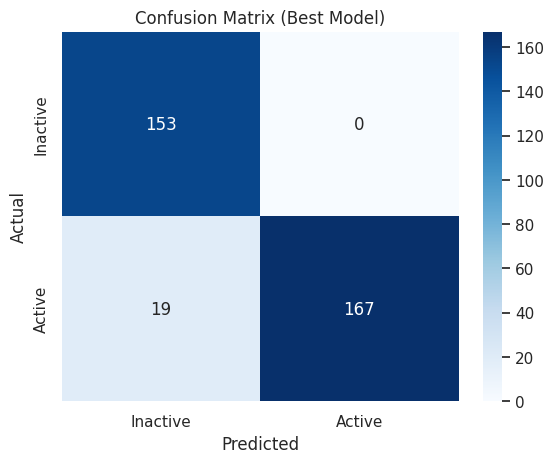

In [ ]:
# Confusion Matrix untuk model terbaik
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=['Inactive', 'Active'], yticklabels=['Inactive', 'Active'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Best Model)')
plt.show()

In [ ]:
# ROC-AUC untuk model terbaik
roc_auc_best = roc_auc_score(y_test, y_pred_best_proba)
print("\nROC-AUC Score (Best Model):", roc_auc_best)


ROC-AUC Score (Best Model): 0.9861374657389838


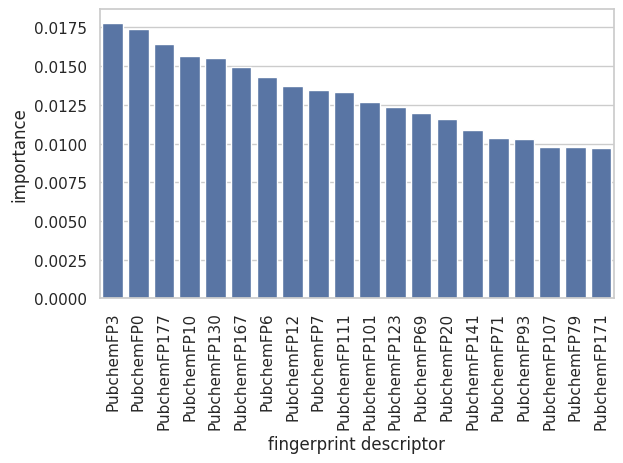

In [ ]:
# get importance with Random Forest
importance = model.best_estimator_.named_steps['classifier'].feature_importances_
fp = sorted(range(len(importance)), key=lambda i: importance[i], reverse=True)[:20]
imp_values = sorted(importance, reverse=True)[:20]
fp = ['PubchemFP'+str(i) for i in fp]
imp_values
fake = pd.DataFrame({'ind': fp, 'importance__': imp_values})
ax = sns.barplot(x = 'ind', y = 'importance__', data = fake)
ax.set(xlabel='fingerprint descriptor', ylabel='importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Lazy Predict

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = reg.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:32<00:00,  1.29it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 543
[LightGBM] [Info] Number of data points in the train set: 1353, number of used features: 181
[LightGBM] [Info] Start training from score 0.487805


In [ ]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.52,0.78,0.23,1.36
BaggingRegressor,0.50,0.77,0.24,0.20
HistGradientBoostingRegressor,0.40,0.72,0.26,0.92
SVR,0.35,0.70,0.27,0.24
MLPRegressor,0.35,0.70,0.27,1.68
LGBMRegressor,0.35,0.70,0.27,0.23
ExtraTreesRegressor,0.30,0.68,0.28,2.31
ExtraTreeRegressor,0.30,0.67,0.28,0.09
DecisionTreeRegressor,0.28,0.67,0.29,0.13


In [ ]:
test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,0.52,0.78,0.23,1.36
BaggingRegressor,0.50,0.77,0.24,0.20
HistGradientBoostingRegressor,0.40,0.72,0.26,0.92
SVR,0.35,0.70,0.27,0.24
MLPRegressor,0.35,0.70,0.27,1.68
LGBMRegressor,0.35,0.70,0.27,0.23
ExtraTreesRegressor,0.30,0.68,0.28,2.31
ExtraTreeRegressor,0.30,0.67,0.28,0.09
DecisionTreeRegressor,0.28,0.67,0.29,0.13


[(0.0, 1.0)]

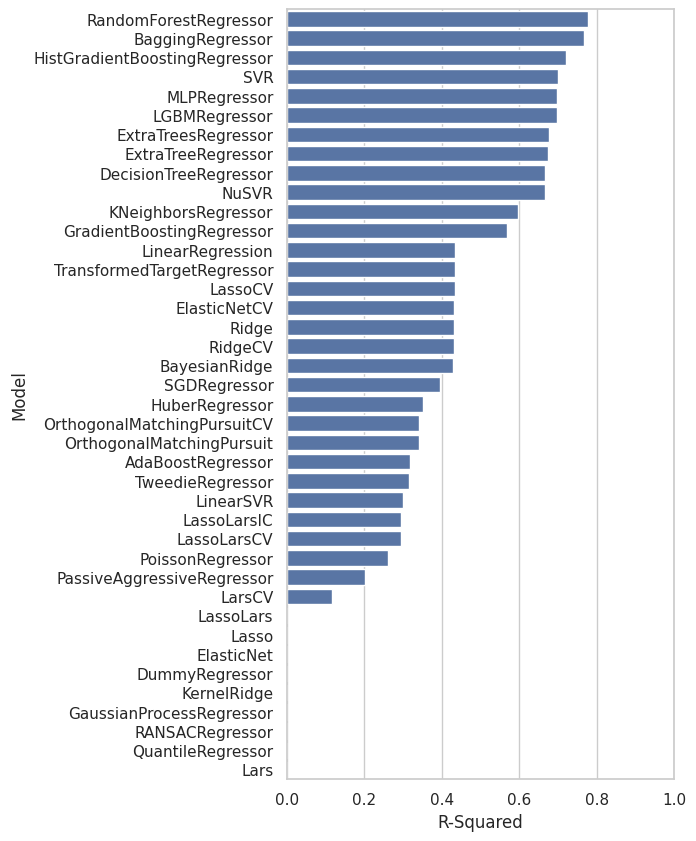

In [ ]:
# Bar plot of R-squared values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="R-Squared", data=train)
ax.set(xlim=(0, 1))
#plt.savefig('plot_benchmark_RSquared.png', dpi=800)

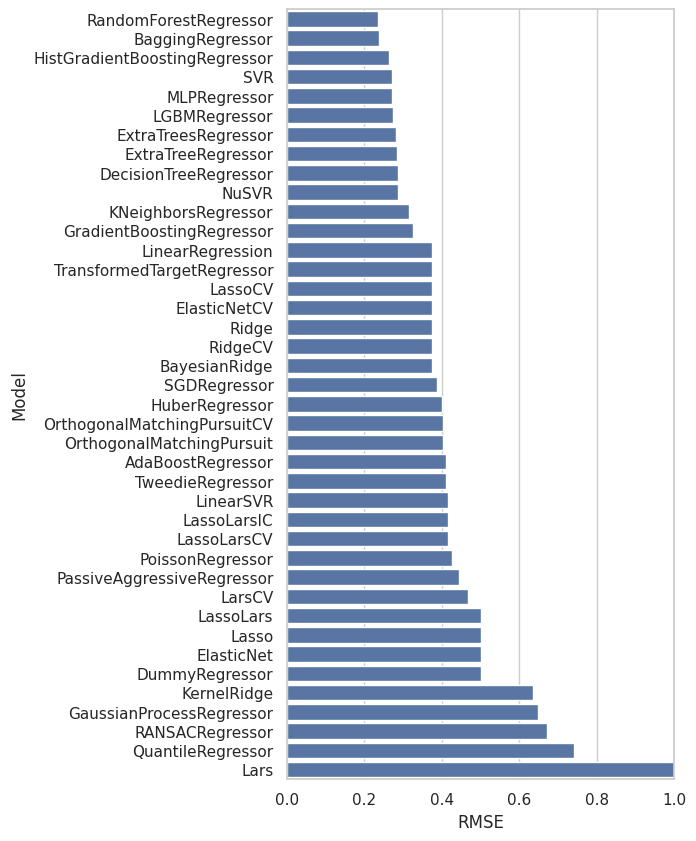

In [ ]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="RMSE", data=train)
ax.set(xlim=(0, 1))
plt.savefig('plot_benchmark_RMSE.png', dpi=600) # Corrected line

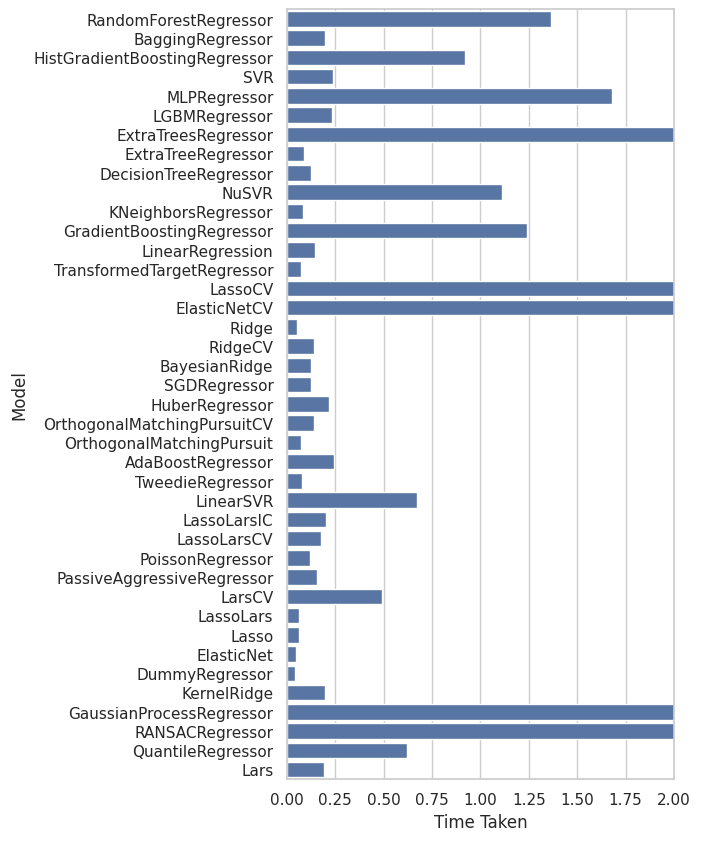

In [ ]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 2))
plt.savefig('plot_benchmark_calculation_time.pdf')